In [104]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib import colors
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['figure.figsize'] = 10, 5

## Classification with Moons dataset

<AxesSubplot:xlabel='x', ylabel='y'>

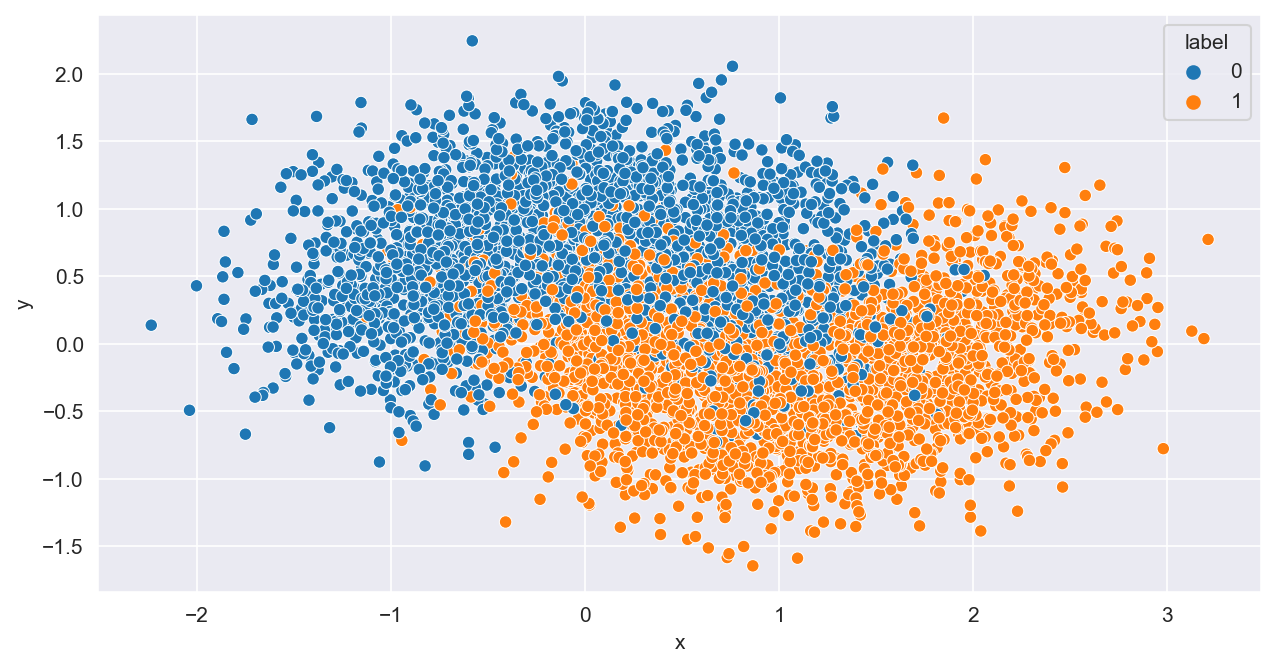

In [105]:
x, y = make_moons(n_samples = 5000, noise=0.4, random_state=100)
moons = pd.DataFrame(x, columns=['x', 'y'])
moons['label'] = y
sns.set_style("darkgrid")
sns.scatterplot(moons, x='x', y= 'y', hue='label',)

In [106]:
import network as network
from activation_functions import Sigmoid, ReLU
from utils import one_hot_encoder, MultiClassError, SingleClassError
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix

x = moons[["x", "y"]].to_numpy()
y = moons["label"].to_numpy()

x_train, x_test_val, y_train, y_test_val = train_test_split(
    x, y, test_size=0.3, random_state=42
)

x_val, x_test, y_val, y_test = train_test_split(
    x_test_val, y_test_val, test_size = .25
)

### Create new model with 2 hidden layers

In [70]:
net = network.Network(2)
net.add_layer(8, ReLU())
net.add_layer(8, ReLU())
net.add_output_layer(1, Sigmoid(1))

In [71]:
stats = net.train(
    x_train, y_train, x_val, y_val, 
    estimator=SingleClassError(),
    eta=10e-4,
    epochs=25,
    verbose=False
)

Epoch : 25 -  Training Loss: 0.1783 - Validaition Loss 0.216
------------------------------------------------------------


### Some fancy numbers

> Model accuracy: 84.0%. ROC AUC Score: 0.84


/var/folders/1w/mc9rf_0n4cbf0mk00k69nvb00000gn/T/ipykernel_50512/1094781425.py:20: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.lineplot(losses, palette=palette)


<AxesSubplot:>

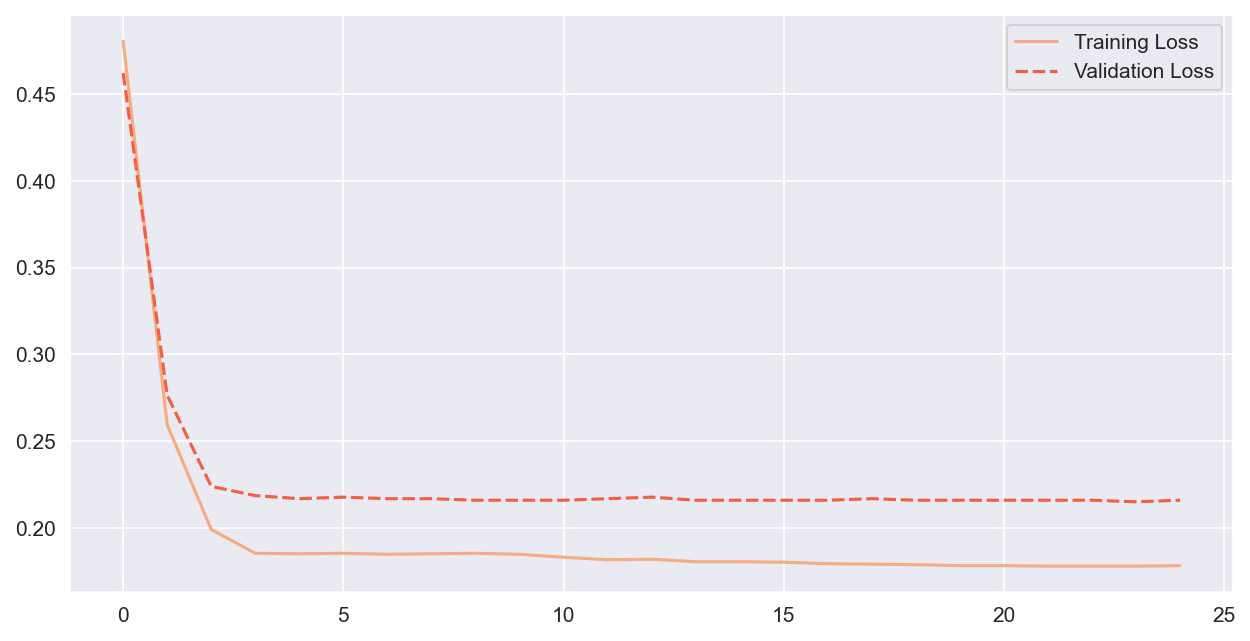

In [107]:
predictions = []

for p in x_test:
    predictions.append(round(net.output(p)[0]))

predictions = np.array(predictions) 

accuracy = round(accuracy_score(y_test, predictions), 2)*100
roc = round(roc_auc_score(y_test, predictions), 2)
fpr, tpr, _ = roc_curve(y_test, predictions)
print(f'> Model accuracy: {accuracy}%. ROC AUC Score: {roc}')

losses = pd.DataFrame({'Training Loss':stats[0], 'Validation Loss':stats[1]})

palette = sns.color_palette("rocket_r", 2)
sns.set_style("darkgrid")
sns.lineplot(losses, palette=palette)


<AxesSubplot:>

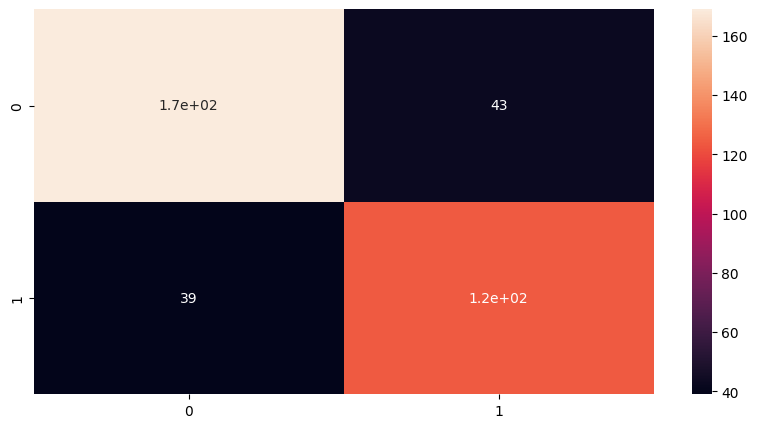

In [73]:
C = confusion_matrix(y_test, predictions)
sns.heatmap(C, annot=True)

## Classification with MNIST handwritten digits dataset

Import dataset and split it

In [124]:
mnist_train = pd.read_csv('data/mnist/train.csv')

y_train = one_hot_encoder(mnist_train[:30000]['label'].to_numpy())
x_train = mnist_train[:30000].drop(['label'], axis=1).to_numpy()
x_train = (x_train / 255) # type: ignore

y_valid = one_hot_encoder(mnist_train[30000:36000]['label'].to_numpy())
x_valid = mnist_train[30000:36000].drop(['label'], axis=1).to_numpy()
x_valid = (x_valid / 255)  # type: ignore

y_test = one_hot_encoder(mnist_train[30000:36000]['label'].to_numpy())
x_test = mnist_train[30000:36000].drop(['label'], axis=1).to_numpy()
x_test = (x_test / 255)  # type: ignore


In [125]:
net = network.Network(28*28)
net.add_layer(10, ReLU())
net.add_output_layer(10, Sigmoid(a=0.05))

In [126]:
stats = net.train(
    x_train, y_train, x_valid, y_valid, 
    MultiClassError(),
    epochs=10, 
    eta=10e-3,
    verbose=False
)

Epoch : 10 -  Training Loss: 0.0778 - Validaition Loss 0.094
------------------------------------------------------------


In [127]:
predictions = []

for p in x_test:
    predictions.append(np.round(net.output(p)))

predictions = np.array(predictions) 

> Model accuracy: 84.0%. ROC AUC Score: 0.93


<AxesSubplot:>

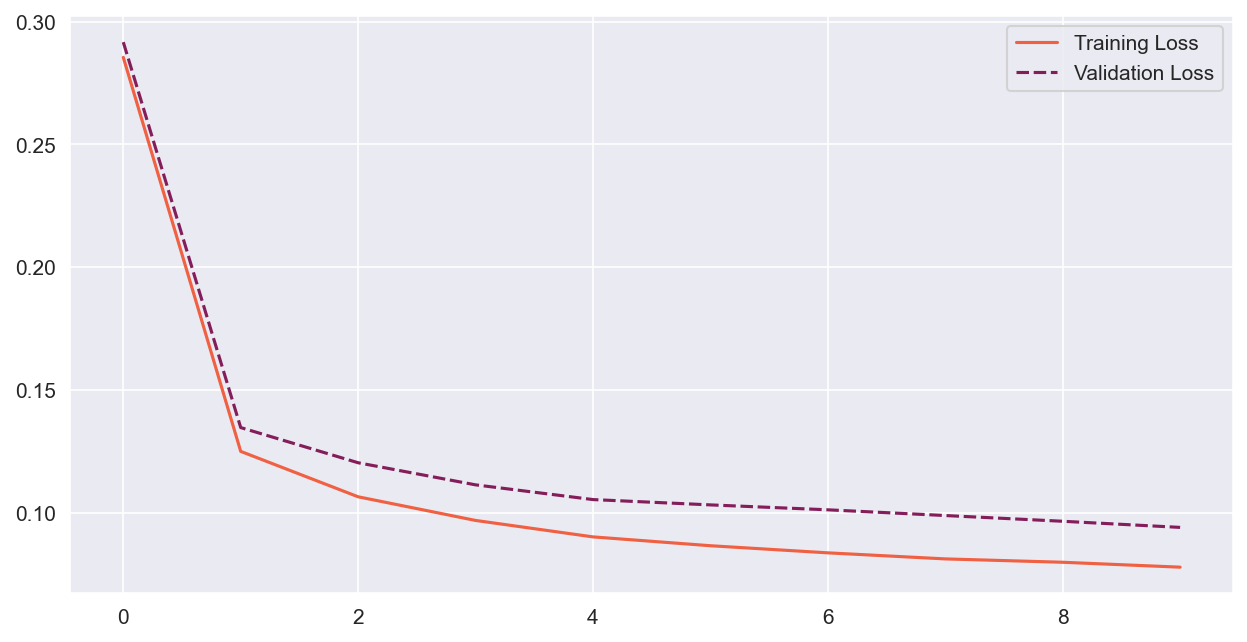

In [128]:
accuracy = round(accuracy_score(y_test, predictions), 2)*100
roc = round(roc_auc_score(y_test, predictions), 2)

print(f'> Model accuracy: {accuracy}%. ROC AUC Score: {roc}')

losses = pd.DataFrame({'Training Loss':stats[0], 'Validation Loss':stats[1]})

palette = sns.color_palette("rocket_r", 2)
sns.set_style("darkgrid")
sns.lineplot(losses, palette=palette)